# Code Execution


A [Planning and Control](https://arxiv.org/abs/2507.07257) strategy to execute code with an **engineer** agent.  


## Planning and Control


This is a common strategy that is at the basis of most *Deep Research/Coding* tools, like [Claude Code](https://www.anthropic.com/claude-code) or [ChatGPT Deep research](https://openai.com/index/introducing-deep-research/).  

The idea is simple and illustrated below. 

<img src="planning_and_control.png" alt="Planning and Control" width="400"/>


### Planning

The **main task** is broken down into sub-tasks by **planner agents**. The sequence of sub-tasks forms a **Plan**.

### Control

The Plan is executed step-by-step. 



## Example: Make A Plot


Here, the input to the system is a task... We want to make a plot. 

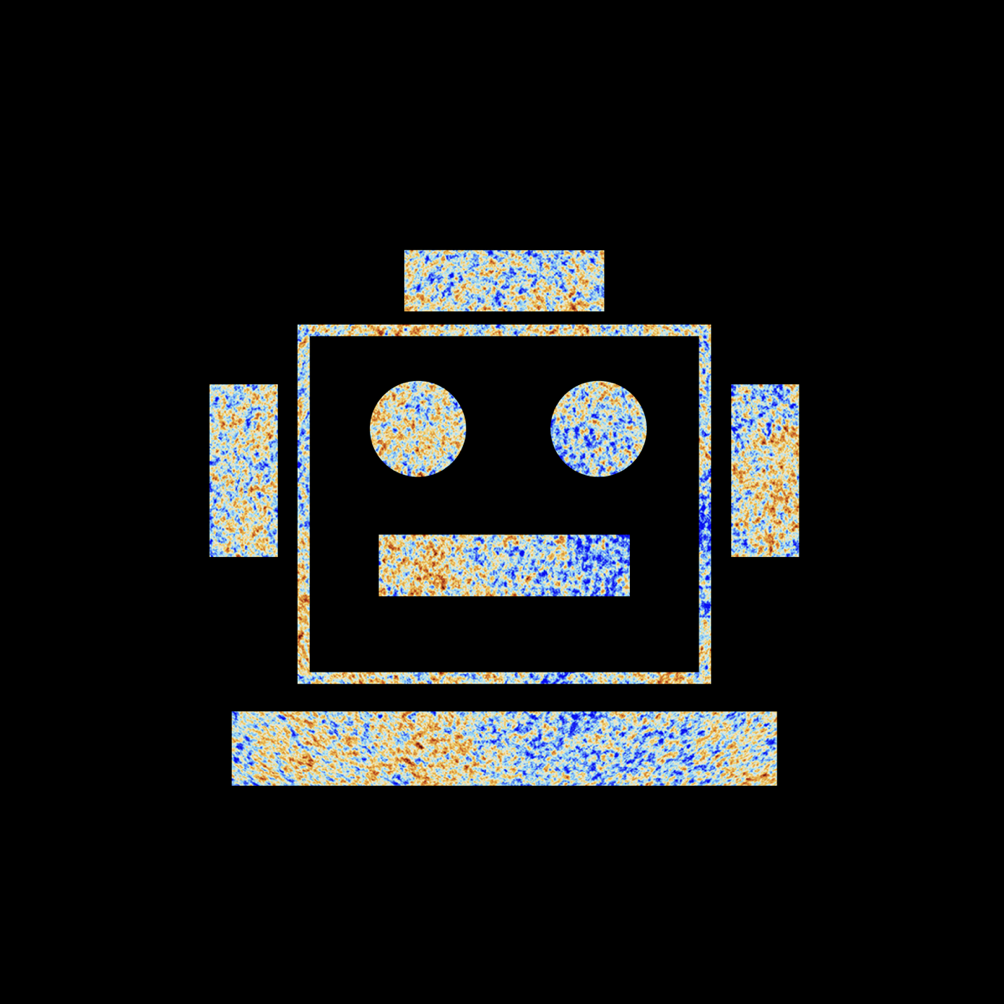


Multi-Agent Systems for Autonomous Discovery


Get the source code [here](https://github.com/CMBAgents/cmbagent/tree/main).

Built with [AG2](https://github.com/ag2ai/ag2).


In [1]:
import os
os.environ["CMBAGENT_DISABLE_DISPLAY"] = "false"
import cmbagent
root = "~/Desktop/"
work_dir = root+"cmbagent_dir"

In [2]:
task = r"""
Plot a 3D Möbius strip using matplotlib.
"""

### One-Shot 

In this first example we **bypass the planning stage and enter directly control** with our task. 


Plot a 3D Möbius strip using matplotlib.


--------------------------------------------------------------------------------

Calling engineer...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gemini-2.5-pro,engineer,0.01074,1714,860,2574


**Code Explanation:**

The Python code generates and saves a 3D plot of a Möbius strip. It uses `numpy` to create the parametric coordinates of the strip and `matplotlib` for plotting. The Möbius strip is defined by its parametric equations, where `u` represents the angle along the main loop and `v` represents the width of the strip. The script creates a 3D surface plot, customizes it with a title and axis labels, and then saves the figure as a high-resolution PNG file in the `data/` directory. The filename includes a timestamp to ensure uniqueness. A confirmation message is printed to the console upon successful saving of the plot.

**Python Code:**
```python
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D

def plot_mobius_strip():
    """
    Generates and saves a 3D plot of a Möbius strip.

    The function parameterizes the Möbius strip, creates a 3D surface plot
    using matplotlib, a

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
o3-mini-2025-01-31,engineer_response_formatter,0.00685,1522,1176,2698


**Code Explanation:**

The Python code generates and saves a 3D plot of a Möbius strip. It uses numpy to create the parametric coordinates of the strip and matplotlib for plotting. The Möbius strip is defined by its parametric equations, where u represents the angle along the main loop and v represents the width of the strip. The script creates a 3D surface plot, customizes it with a title and axis labels, and then saves the figure as a high-resolution PNG file in the data/ directory. The filename includes a timestamp to ensure uniqueness. A confirmation message is printed to the console upon successful saving of the plot.

**Python Code:**

```python
# filename: codebase/mobius_strip_plot.py
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D

def plot_mobius_strip():
    """
    Generates and saves a 3D plot of a Möbius strip.

    The function parameterizes the Möbius strip, creates a 3D sur

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
o3-mini-2025-01-31,executor_response_formatter,0.00150,1217,37,1254



--------------------------------------------------------------------------------
Execution status: success. Transfer to control.

xxxxxxxxxxxxxxxxxxxxxxxxxx

Workflow status:

Plan step number: 1

Agent for sub-task (might be different from the next agent suggestion for debugging): engineer

Current status (before execution): In progress

xxxxxxxxxxxxxxxxxxxxxxxxxx



--------------------------------------------------------------------------------

Calling control...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,control,0.00477,2229,39,2268



--------------------------------------------------------------------------------


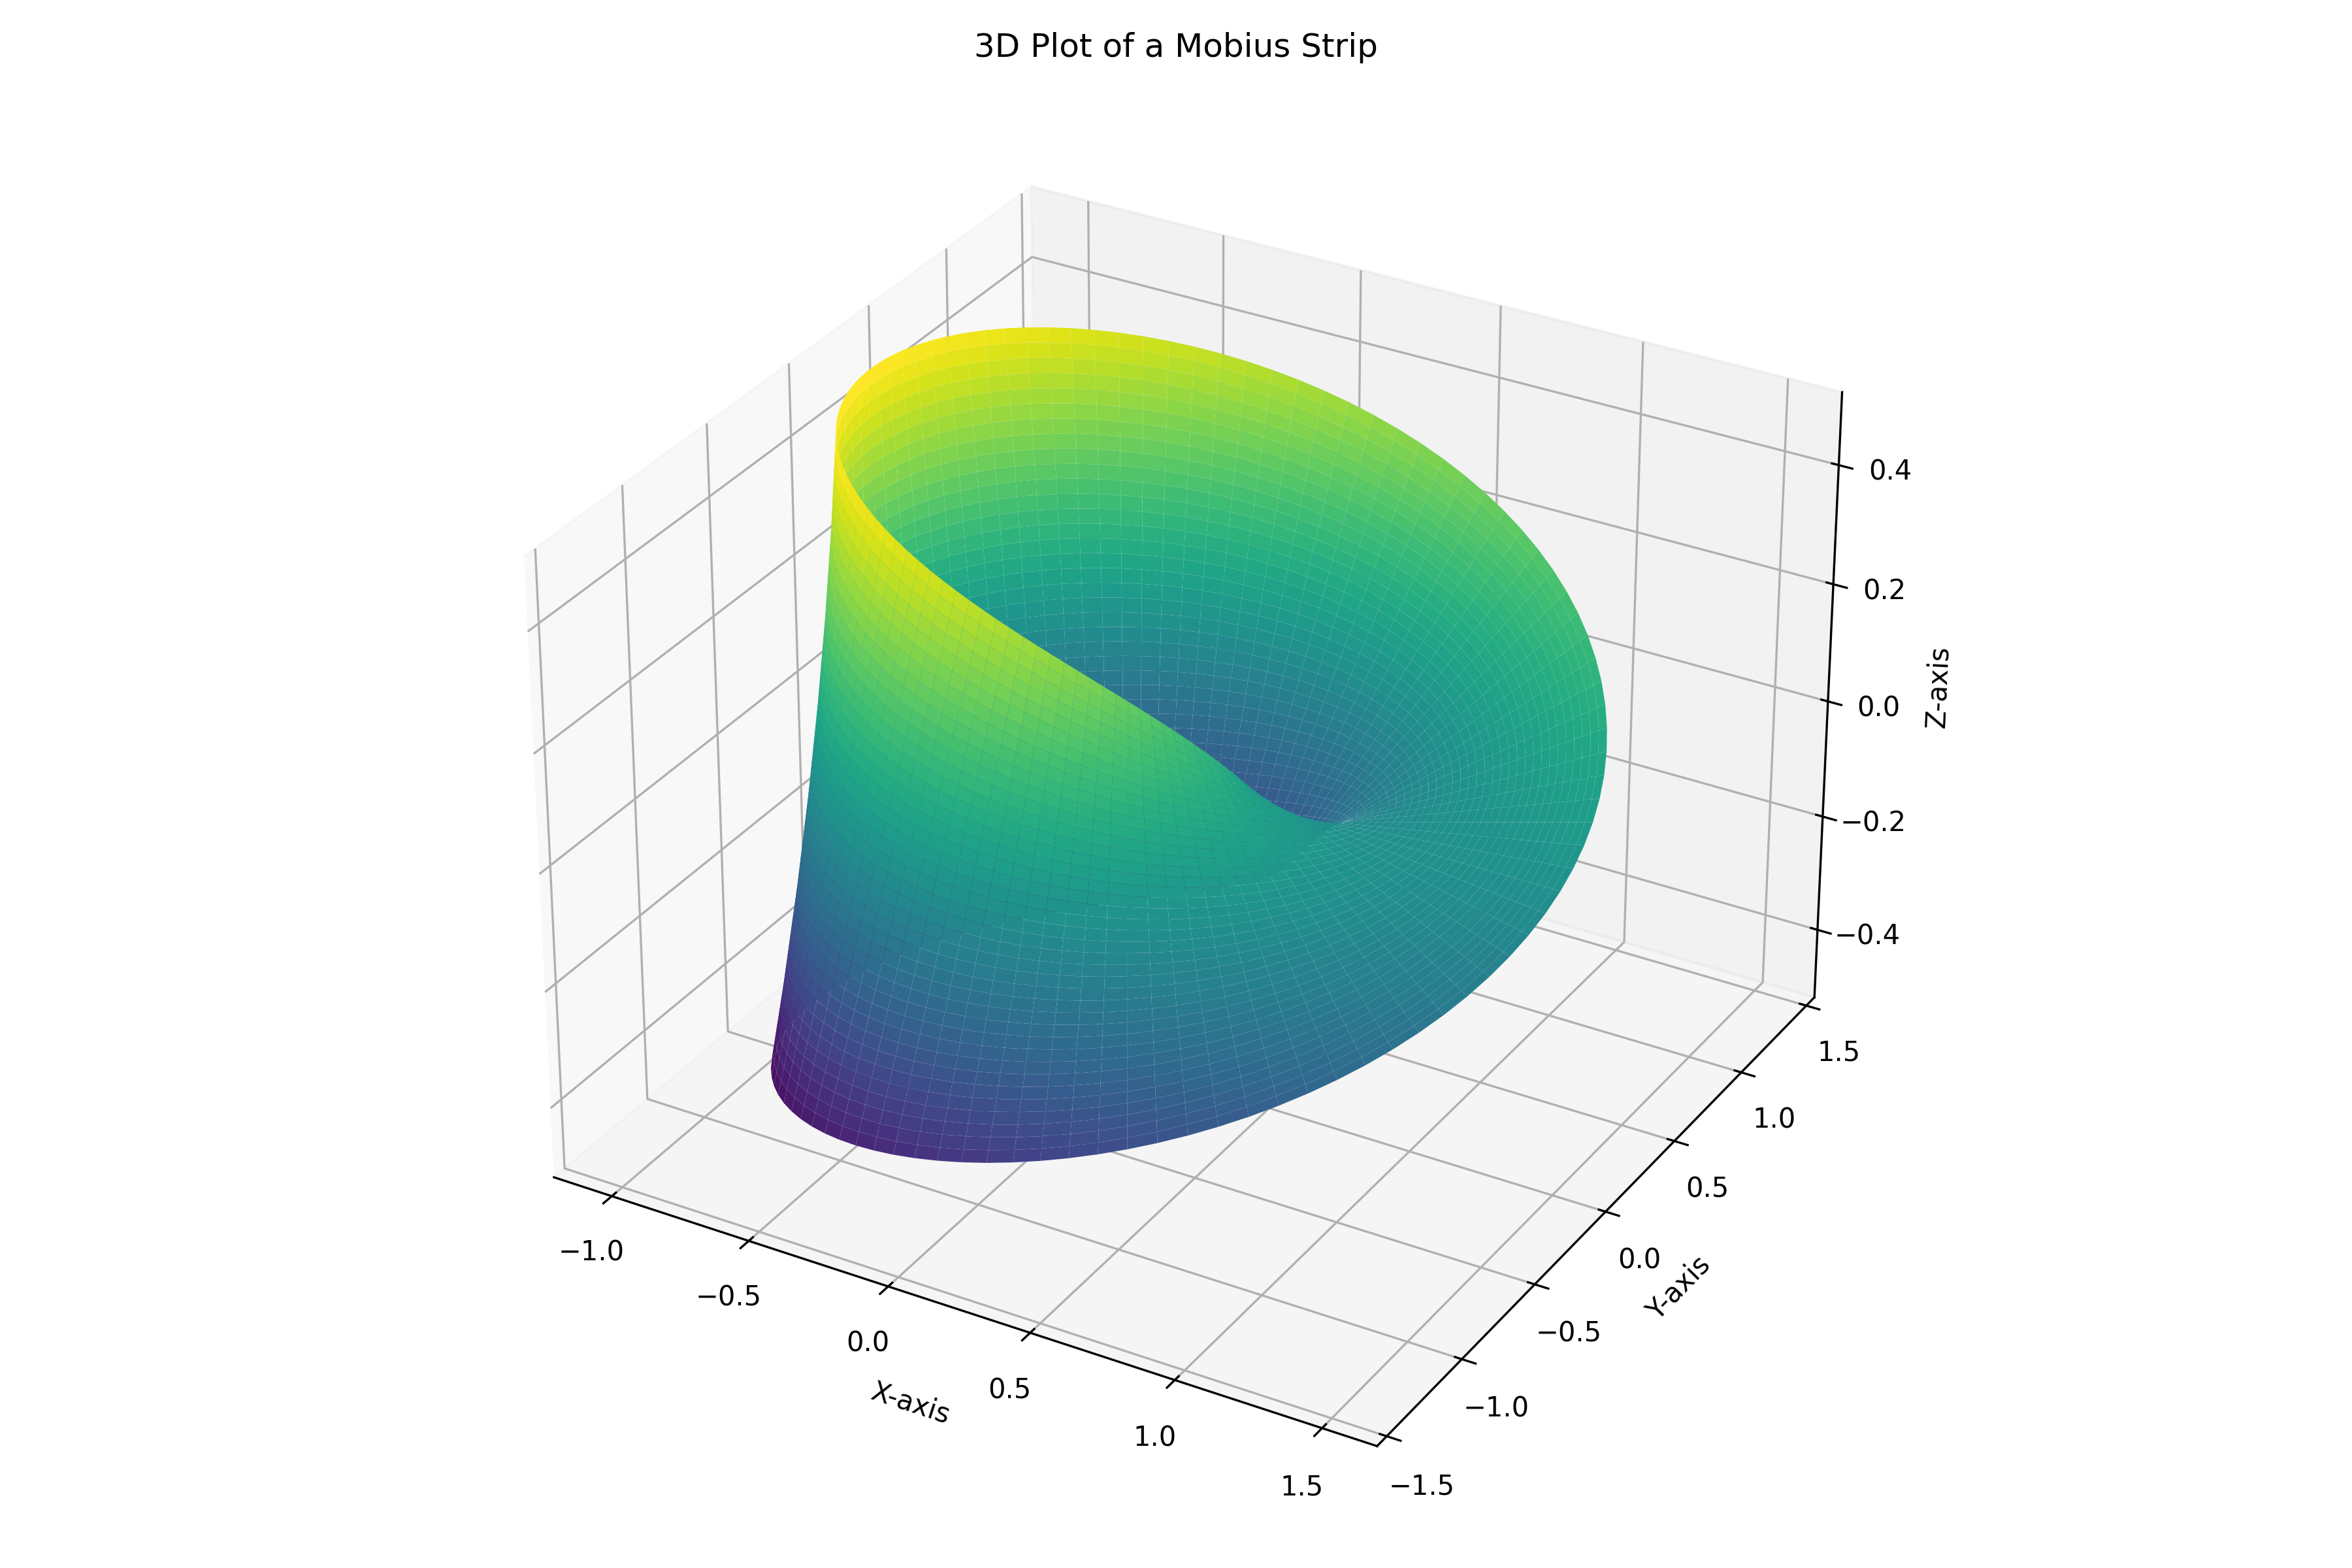


**Step number:** 1 out of 1.
 
**Sub-task:** solve the main task.
 
**Agent in charge of sub-task:** `engineer`
 
**Instructions:**
 
solve the main task.
 
**Status:** completed ✅
        

--------------------------------------------------------------------------------
Terminating...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,terminator,0.00353,1760,1,1761



--------------------------------------------------------------------------------
Session terminated.

--------------------------------------------------------------------------------

Displaying cost…

| Agent                       | Cost ($)    | Prompt Tokens | Completion Tokens | Total Tokens | Model              |
|:----------------------------|------------:|--------------:|------------------:|-------------:|-------------------:|
| executor response formatter | $0.00150150 |          1217 |                37 |         1254 | o3-mini-2025-01-31 |
| engineer response formatter | $0.00684860 |          1522 |              1176 |         2698 | o3-mini-2025-01-31 |
| terminator                  | $0.00352800 |          1760 |                 1 |         1761 | gpt-4.1-2025-04-14 |
| control                     | $0.00477000 |          2229 |                39 |         2268 | gpt-4.1-2025-04-14 |
| engineer                    | $0.01074250 |          1714 |               860 |        

In [3]:
results = cmbagent.one_shot(task,
                   max_rounds=50,
                   agent='engineer',
                   # engineer_model='gpt-4.1-2025-04-14',
                   engineer_model='gemini-2.5-pro',
                   # engineer_model = 'claude-sonnet-4-20250514',
                   work_dir=work_dir,
                   clear_work_dir = True,
                  )


#### Post-Processing Traces

In [4]:
import os
from IPython.display import display, Markdown

def list_dir_tree(startpath, max_depth=5):
    output = ""
    startpath = os.path.expanduser(startpath)
    for root, dirs, files in os.walk(startpath):
        # Limit depth
        depth = root[len(startpath):].count(os.sep)
        if depth > max_depth:
            continue
        indent = "    " * depth
        output += f"{indent}- `{os.path.basename(root)}/`\n"
        for f in files:
            output += f"{indent}    - {f}\n"
    return output

tree_md = list_dir_tree(work_dir)
display(Markdown(f"**Tree view of** `{work_dir}`\n\n{tree_md}"))


**Tree view of** `~/Desktop/cmbagent_dir`

- `cmbagent_dir/`
    - `cost/`
        - cost_report_20250804_180212.json
    - `time/`
        - timing_report_20250804_180212.json
    - `codebase/`
        - mobius_strip_plot.py
    - `chats/`
        - nested_chat_output_engineer_step_1_attempt_1.json
        - chat_output_step_1.json
    - `data/`
        - mobius_strip_plot_1_1754326925.png


### Planning and Control

Now we use planning and control with a two-step plan for the same task.


Plot a 3D Möbius strip using matplotlib.


--------------------------------------------------------------------------------
Setting agents for the session...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,plan_setter,0.00049,215,8,223



--------------------------------------------------------------------------------
Plan constraints have been logged.

--------------------------------------------------------------------------------

Calling planner...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,planner,0.00210,410,160,570


**Plan:**
   - Step 1:
         * sub-task: Write Python code to generate the coordinates of a 3D Möbius strip.
         * agent: engineer
         * bullet points:
            - Define the parametric equations for a Möbius strip.
            - Generate a meshgrid of parameters for the strip.
            - Compute the x, y, z coordinates for the Möbius strip surface.
   - Step 2: 
         * sub-task: Plot the 3D Möbius strip using matplotlib.
         * agent: engineer
         * bullet points:
            - Use matplotlib's 3D plotting capabilities to visualize the Möbius strip.
            - Set appropriate labels, titles, and viewing angles for clarity.
            - Display the plot.

--------------------------------------------------------------------------------
Formatting...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,planner_response_formatter,0.00192,419,135,554



**PLAN**

- Step 1:
	* sub-task: Write Python code to generate the coordinates of a 3D Möbius strip.
	* agent in charge: engineer

	* instructions:
		- Define the parametric equations for a Möbius strip.
		- Generate a meshgrid of parameters for the strip.
		- Compute the x, y, z coordinates for the Möbius strip surface.

- Step 2:
	* sub-task: Plot the 3D Möbius strip using matplotlib.
	* agent in charge: engineer

	* instructions:
		- Use matplotlib's 3D plotting capabilities to visualize the Möbius strip.
		- Set appropriate labels, titles, and viewing angles for clarity.
		- Display the plot.

        

--------------------------------------------------------------------------------
Recording plan...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,plan_recorder,0.00251,472,196,668



--------------------------------------------------------------------------------
Plan has been logged.

--------------------------------------------------------------------------------
Reviewing plan...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
claude-sonnet-4-20250514,plan_reviewer,0.00819,1210,304,1514


**Recommendations:**

- Step 1 should include specific guidance on the parameter ranges, such as specifying that the angle parameter (u) should range from 0 to 2π and the width parameter (v) should range from -1 to 1 for proper Möbius strip generation.

- Step 1 instructions should explicitly mention the need to import required libraries (numpy for mathematical operations and matplotlib for plotting) at the beginning of the code generation process.

- Step 1 should specify the exact parametric equations to use: x = (R + v*cos(u/2))*cos(u), y = (R + v*cos(u/2))*sin(u), z = v*sin(u/2), where R is the radius of the central circle.

- Step 2 should include instructions to use the plot_surface() function specifically, as this is the most appropriate matplotlib method for rendering 3D surfaces like the Möbius strip.

- Step 2 should specify that the engineer should set the aspect ratio to 'equal' to ensure the Möbius strip appears with correct proportions and geometric accuracy.

- Step 2 in

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,reviewer_response_formatter,0.00284,367,263,630



**Recommendations:**

Step 1 should include specific guidance on the parameter ranges, such as specifying that the angle parameter (u) should range from 0 to 2π and the width parameter (v) should range from -1 to 1 for proper Möbius strip generation.

Step 1 instructions should explicitly mention the need to import required libraries (numpy for mathematical operations and matplotlib for plotting) at the beginning of the code generation process.

Step 1 should specify the exact parametric equations to use: x = (R + v*cos(u/2))*cos(u), y = (R + v*cos(u/2))*sin(u), z = v*sin(u/2), where R is the radius of the central circle.

Step 2 should include instructions to use the plot_surface() function specifically, as this is the most appropriate matplotlib method for rendering 3D surfaces like the Möbius strip.

Step 2 should specify that the engineer should set the aspect ratio to 'equal' to ensure the Möbius strip appears with correct proportions and geometric accuracy.

Step 2 instructions 

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,review_recorder,0.00287,347,272,619



--------------------------------------------------------------------------------

Recommendations have been logged.  
Number of feedback rounds left: 0. 
Now, update the plan accordingly, planner!

--------------------------------------------------------------------------------

Calling planner...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,planner,0.00867,2521,453,2974


**Plan:**

- Step 1:
    * sub-task: Write Python code to generate the coordinates of a 3D Möbius strip.
    * agent: engineer
    * bullet points:
        - Import the required libraries: numpy for mathematical operations and matplotlib for plotting.
        - Define the parametric equations for the Möbius strip:
            - x = (R + v*cos(u/2))*cos(u)
            - y = (R + v*cos(u/2))*sin(u)
            - z = v*sin(u/2)
            - where R is the radius of the central circle.
        - Set the parameter ranges: u from 0 to 2π, v from -1 to 1.
        - Generate a meshgrid for u and v.
        - Compute the x, y, z coordinates for the Möbius strip surface.

- Step 2:
    * sub-task: Plot the 3D Möbius strip using matplotlib.
    * agent: engineer
    * bullet points:
        - Use matplotlib's plot_surface() function to render the Möbius strip.
        - Apply a colormap (e.g., based on the z coordinate) to visualize the surface's topology and twist.
        - Set the aspect rati

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,planner_response_formatter,0.00509,971,394,1365



**PLAN**

- Step 1:
	* sub-task: Write Python code to generate the coordinates of a 3D Möbius strip.
	* agent in charge: engineer

	* instructions:
		- Import the required libraries: numpy for mathematical operations and matplotlib for plotting.
		- Define the parametric equations for the Möbius strip:
		- x = (R + v*cos(u/2))*cos(u)
		- y = (R + v*cos(u/2))*sin(u)
		- z = v*sin(u/2)
		- where R is the radius of the central circle.
		- Set the parameter ranges: u from 0 to 2π, v from -1 to 1.
		- Generate a meshgrid for u and v.
		- Compute the x, y, z coordinates for the Möbius strip surface.

- Step 2:
	* sub-task: Plot the 3D Möbius strip using matplotlib.
	* agent in charge: engineer

	* instructions:
		- Use matplotlib's plot_surface() function to render the Möbius strip.
		- Apply a colormap (e.g., based on the z coordinate) to visualize the surface's topology and twist.
		- Set the aspect ratio to 'equal' for all axes to ensure geometric accuracy.
		- Add appropriate labels, ti

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,plan_recorder,0.00654,1088,546,1634



--------------------------------------------------------------------------------
Planning stage complete. Exiting.

--------------------------------------------------------------------------------
Terminating...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,terminator,0.00513,2561,1,2562



--------------------------------------------------------------------------------
Session terminated.

--------------------------------------------------------------------------------

Displaying cost…

| Agent                       | Cost ($)    | Prompt Tokens | Completion Tokens | Total Tokens | Model                    |
|:----------------------------|------------:|--------------:|------------------:|-------------:|-------------------------:|
| reviewer response formatter | $0.00283800 |           367 |               263 |          630 |       gpt-4.1-2025-04-14 |
| plan reviewer               | $0.00819000 |          1210 |               304 |         1514 | claude-sonnet-4-20250514 |
| planner response formatter  | $0.00701200 |          1390 |               529 |         1919 |       gpt-4.1-2025-04-14 |
| planner                     | $0.01076600 |          2931 |               613 |         3544 |       gpt-4.1-2025-04-14 |
| terminator                  | $0.00513000 |        

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,control,0.00336,946,183,1129



--------------------------------------------------------------------------------

**Step number:** 1 out of 2.
 
**Sub-task:** Write Python code to generate the coordinates of a 3D Möbius strip.
 
**Agent in charge of sub-task:** `engineer`
 
**Instructions:**
 
- Import the required libraries: numpy for mathematical operations and matplotlib for plotting.
- Define the parametric equations for the Möbius strip:
- x = (R + v*cos(u/2))*cos(u)
- y = (R + v*cos(u/2))*sin(u)
- z = v*sin(u/2)
- where R is the radius of the central circle.
- Set the parameter ranges: u from 0 to 2π, v from -1 to 1.
- Generate a meshgrid for u and v.
- Compute the x, y, z coordinates for the Möbius strip surface.
 
**Status:** in progress ⏳
        

--------------------------------------------------------------------------------

Calling engineer...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gemini-2.5-pro,engineer,0.01516,2582,1193,3775


**Code Explanation:**

The Python code generates and plots a 3D Möbius strip. It begins by importing the necessary libraries: `numpy` for numerical calculations, `matplotlib.pyplot` for plotting, and `datetime` to create a unique timestamp for the output file.

The script defines the parameters for the Möbius strip. The parametric equations `x = (R + v*cos(u/2))*cos(u)`, `y = (R + v*cos(u/2))*sin(u)`, and `z = v*sin(u/2)` are used, where `R` is the major radius of the strip. The parameters `u` and `v` are discretized over the ranges [0, 2π] and [-1, 1] respectively, using `numpy.linspace`. A `meshgrid` is created from these parameter arrays to represent the surface.

The x, y, and z coordinates of the surface are then calculated based on these parametric equations. A 3D plot is initialized, and the Möbius strip is rendered using `plot_surface`. A colormap is applied to enhance the visualization of the strip's twist. Finally, the plot is given a title and axis labels, saved as a high-re

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
o3-mini-2025-01-31,engineer_response_formatter,0.00821,1805,1414,3219


**Code Explanation:**

The Python code generates and plots a 3D Möbius strip. It begins by importing the necessary libraries: numpy for numerical calculations, matplotlib.pyplot for plotting, and datetime to create a unique timestamp for the output file.

The script defines the parameters for the Möbius strip. The parametric equations x = (R + v*cos(u/2))*cos(u), y = (R + v*cos(u/2))*sin(u), and z = v*sin(u/2) are used, where R is the major radius of the strip. The parameters u and v are discretized over the ranges [0, 2π] and [-1, 1] respectively, using numpy.linspace. A meshgrid is created from these parameter arrays to represent the surface.

The x, y, and z coordinates of the surface are then calculated based on these parametric equations. A 3D plot is initialized, and the Möbius strip is rendered using plot_surface. A colormap is applied to enhance the visualization of the strip's twist. Finally, the plot is given a title and axis labels, saved as a high-resolution PNG file in the

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
o3-mini-2025-01-31,executor_response_formatter,0.00193,1355,101,1456



--------------------------------------------------------------------------------
Execution status: success. Transfer to control.

xxxxxxxxxxxxxxxxxxxxxxxxxx

Workflow status:

Plan step number: 1

Agent for sub-task (might be different from the next agent suggestion for debugging): engineer

Current status (before execution): in progress

xxxxxxxxxxxxxxxxxxxxxxxxxx



--------------------------------------------------------------------------------

Calling control...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,control,0.00841,3477,182,3659



--------------------------------------------------------------------------------


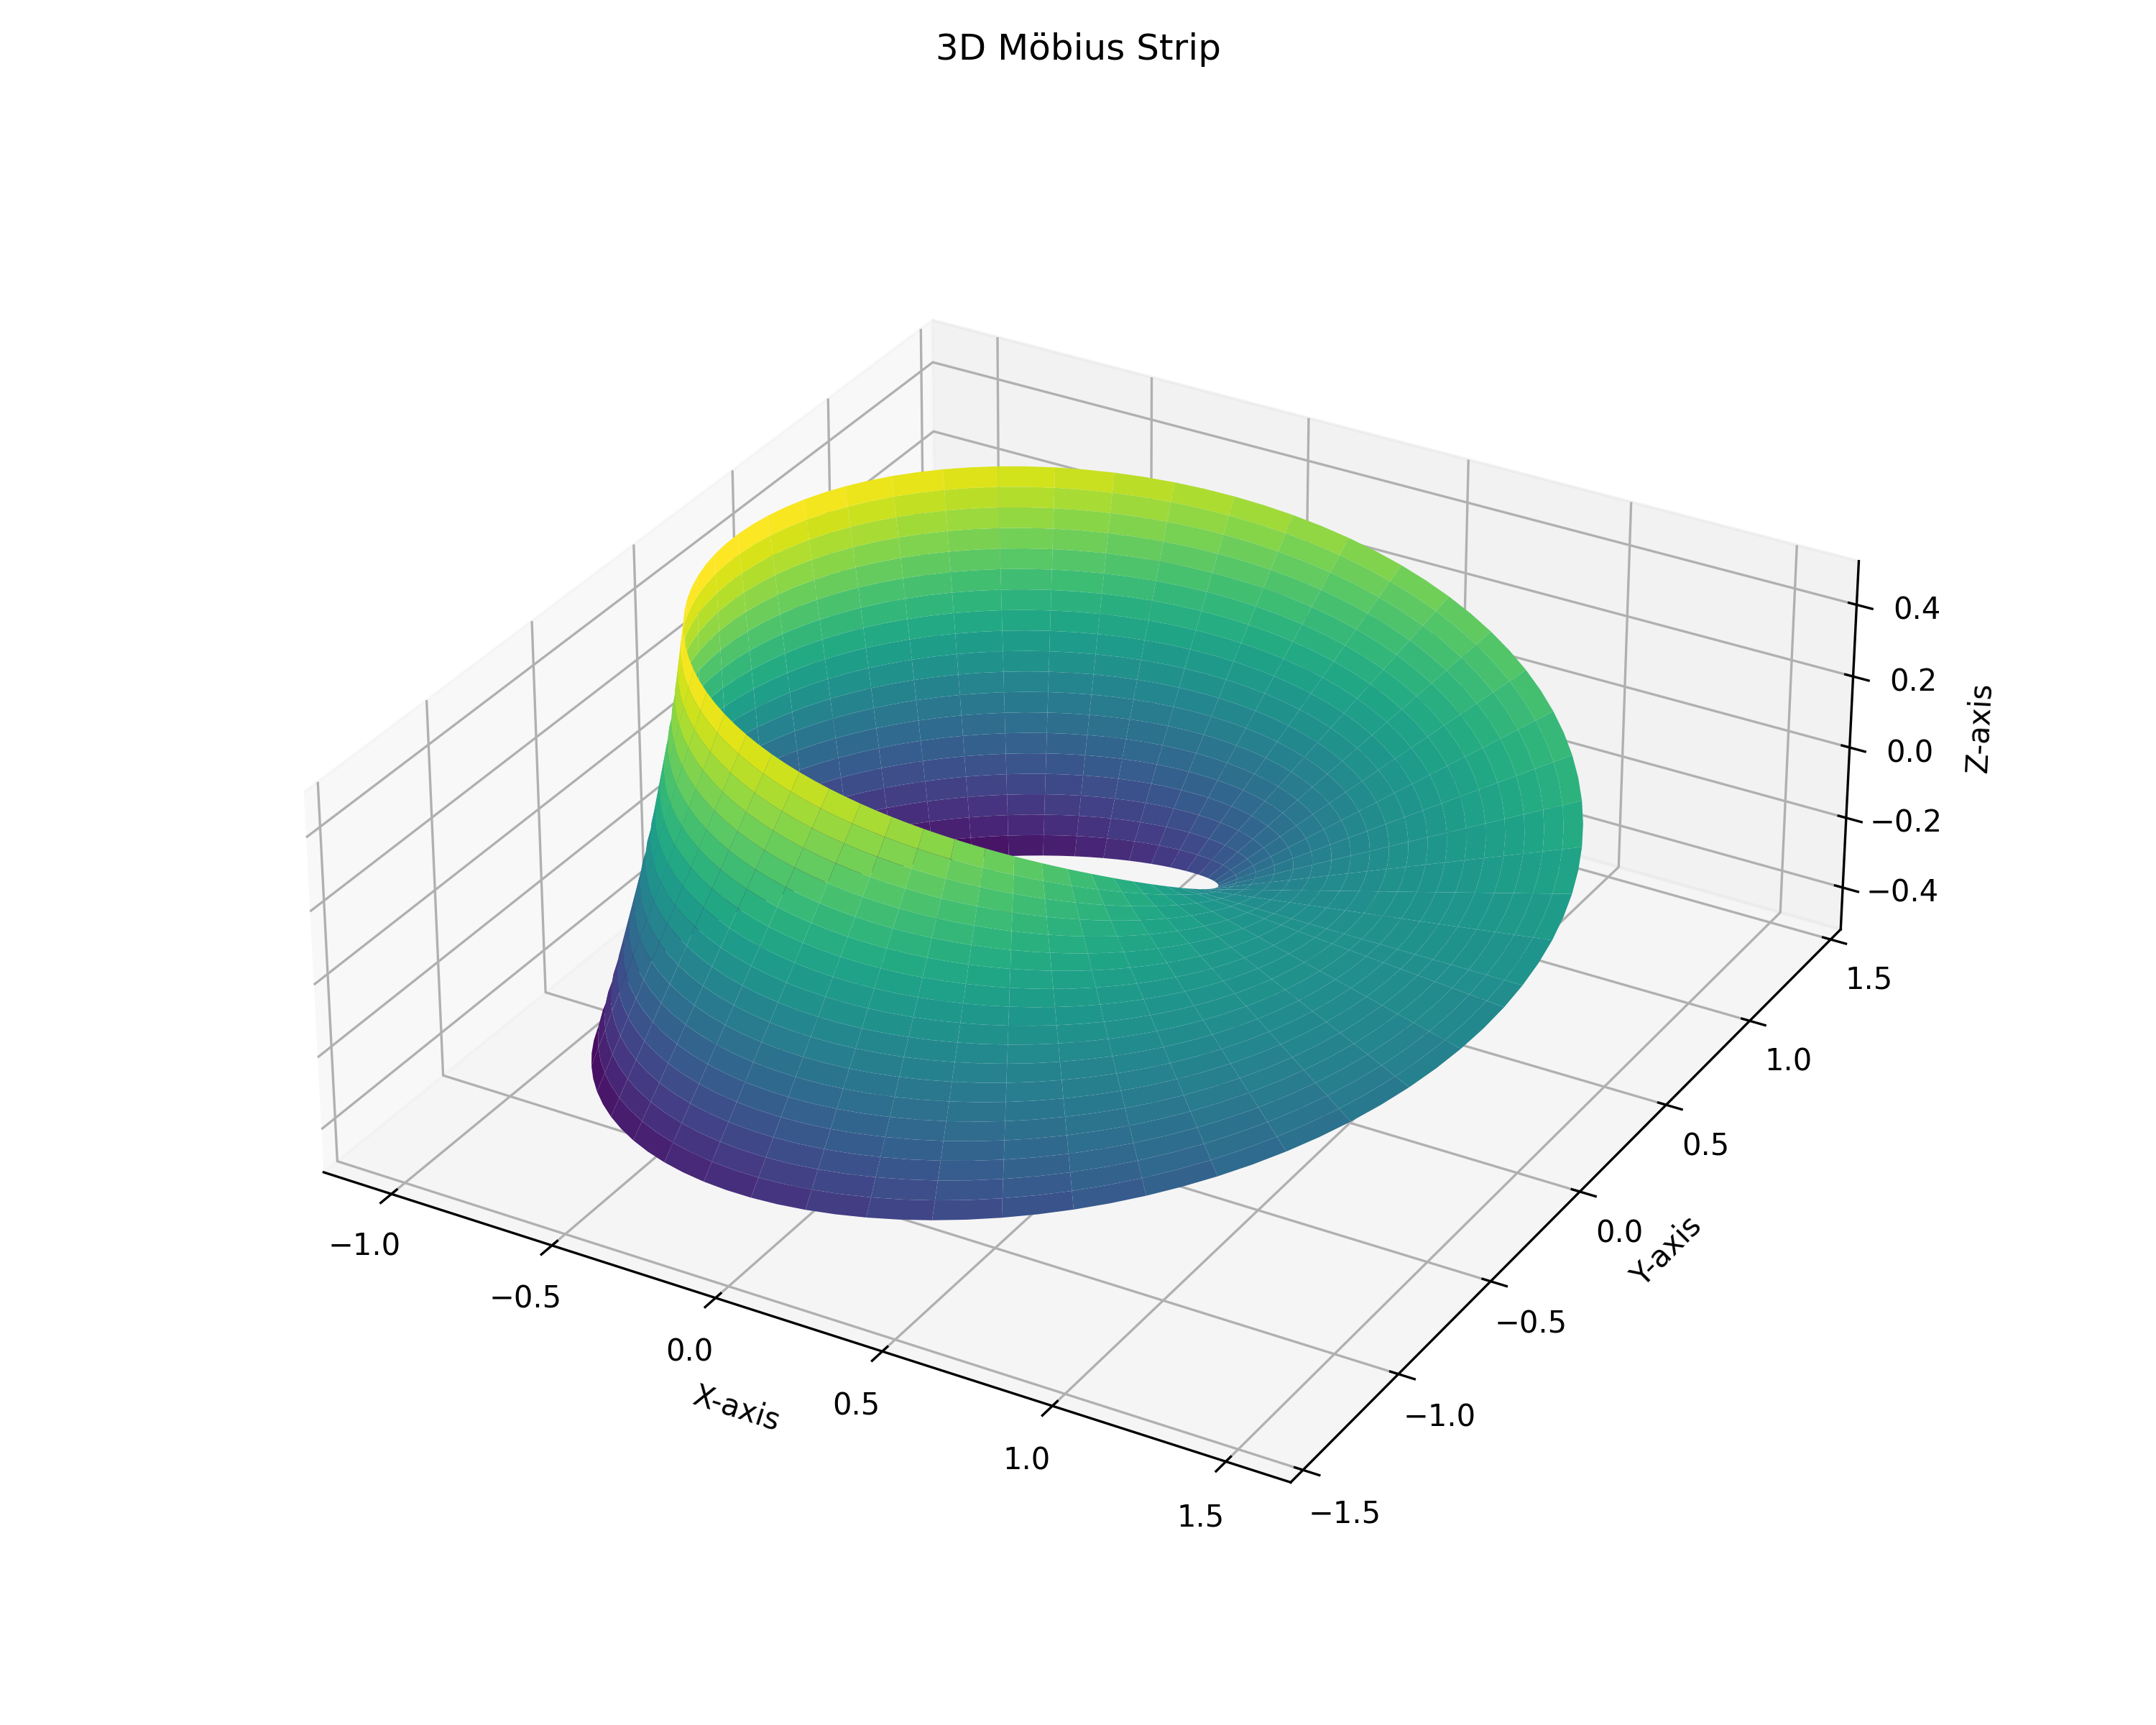


**Step number:** 1 out of 2.
 
**Sub-task:** Write Python code to generate the coordinates of a 3D Möbius strip.
 
**Agent in charge of sub-task:** `engineer`
 
**Instructions:**
 
- Import the required libraries: numpy for mathematical operations and matplotlib for plotting.
- Define the parametric equations for the Möbius strip:
- x = (R + v*cos(u/2))*cos(u)
- y = (R + v*cos(u/2))*sin(u)
- z = v*sin(u/2)
- where R is the radius of the central circle.
- Set the parameter ranges: u from 0 to 2π, v from -1 to 1.
- Generate a meshgrid for u and v.
- Compute the x, y, z coordinates for the Möbius strip surface.
 
**Status:** completed ✅
        

--------------------------------------------------------------------------------

Calling control...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,control,0.00870,3864,122,3986



--------------------------------------------------------------------------------

**Step number:** 2 out of 2.
 
**Sub-task:** Plot the 3D Möbius strip using matplotlib.
 
**Agent in charge of sub-task:** `engineer`
 
**Instructions:**
 
- Use matplotlib's plot_surface() function to render the Möbius strip.
- Apply a colormap (e.g., based on the z coordinate) to visualize the surface's topology and twist.
- Set the aspect ratio to 'equal' for all axes to ensure geometric accuracy.
- Add appropriate labels, titles, and set a suitable viewing angle.
- Display the plot.
 
**Status:** in progress ⏳
        

--------------------------------------------------------------------------------
Terminating...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,terminator,0.00629,3143,1,3144



--------------------------------------------------------------------------------
Session terminated.

--------------------------------------------------------------------------------

Timing report data saved to: /Users/boris/Desktop/cmbagent_dir/control/time/timing_report_step_1_20250804_180345.json


Displaying cost…

| Agent                       | Cost ($)    | Prompt Tokens | Completion Tokens | Total Tokens | Model              |
|:----------------------------|------------:|--------------:|------------------:|-------------:|-------------------:|
| executor response formatter | $0.00193490 |          1355 |               101 |         1456 | o3-mini-2025-01-31 |
| engineer response formatter | $0.00820710 |          1805 |              1414 |         3219 | o3-mini-2025-01-31 |
| terminator                  | $0.00629400 |          3143 |                 1 |         3144 | gpt-4.1-2025-04-14 |
| control                     | $0.02047000 |          8287 |               487 |      

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,control_starter,0.00135,671,1,672



--------------------------------------------------------------------------------

**Step number:** 2 out of 2.
 
**Sub-task:** Plot the 3D Möbius strip using matplotlib.
 
**Agent in charge of sub-task:** `engineer`
 
**Instructions:**
 
- Use matplotlib's plot_surface() function to render the Möbius strip.
- Apply a colormap (e.g., based on the z coordinate) to visualize the surface's topology and twist.
- Set the aspect ratio to 'equal' for all axes to ensure geometric accuracy.
- Add appropriate labels, titles, and set a suitable viewing angle.
- Display the plot.
 
**Status:** in progress ⏳


--------------------------------------------------------------------------------

Calling engineer...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gemini-2.5-pro,engineer,0.01574,3273,1165,4438


**Code Explanation:**

This script generates and plots a 3D Möbius strip. The `generate_mobius_strip_data` function creates the necessary (x, y, z) coordinates based on the parametric equations of the strip. The `plot_mobius_strip` function then takes these coordinates and uses `matplotlib`'s 3D plotting capabilities to render the surface. The plot is colored using the 'viridis' colormap, which varies with the z-coordinate, and is saved to a PNG file in the `data/` directory with a unique timestamp in its name.

**Modifications:**

A call to `ax.view_init(elev=30, azim=-60)` has been added to the `plot_mobius_strip` function. This sets a specific, fixed viewing angle for the 3D plot to provide a clear and consistent perspective of the Möbius strip's geometry, directly addressing the instruction to set a suitable viewing angle.

**Python Code:**

```python
# filename: codebase/mobius_strip_plot.py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
o3-mini-2025-01-31,engineer_response_formatter,0.00774,1771,1316,3087


**Code Explanation:**

This script generates and plots a 3D Möbius strip. The generate_mobius_strip_data function creates the necessary (x, y, z) coordinates based on the parametric equations of the strip. The plot_mobius_strip function then takes these coordinates and uses matplotlib's 3D plotting capabilities to render the surface. The plot is colored using the 'viridis' colormap, which varies with the z-coordinate, and is saved to a PNG file in the data/ directory with a unique timestamp in its name.

**Modifications:**

A call to ax.view_init(elev=30, azim=-60) has been added to the plot_mobius_strip function. This sets a specific, fixed viewing angle for the 3D plot to provide a clear and consistent perspective of the Möbius strip's geometry, directly addressing the instruction to set a suitable viewing angle.

**Python Code:**

```python
# filename: codebase/mobius_strip_plot.py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import date

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
o3-mini-2025-01-31,executor_response_formatter,0.00169,1391,37,1428



--------------------------------------------------------------------------------
Execution status: success. Transfer to control.

xxxxxxxxxxxxxxxxxxxxxxxxxx

Workflow status:

Plan step number: 2

Agent for sub-task (might be different from the next agent suggestion for debugging): engineer

Current status (before execution): in progress

xxxxxxxxxxxxxxxxxxxxxxxxxx



--------------------------------------------------------------------------------

Calling control...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,control,0.00904,4034,121,4155



--------------------------------------------------------------------------------


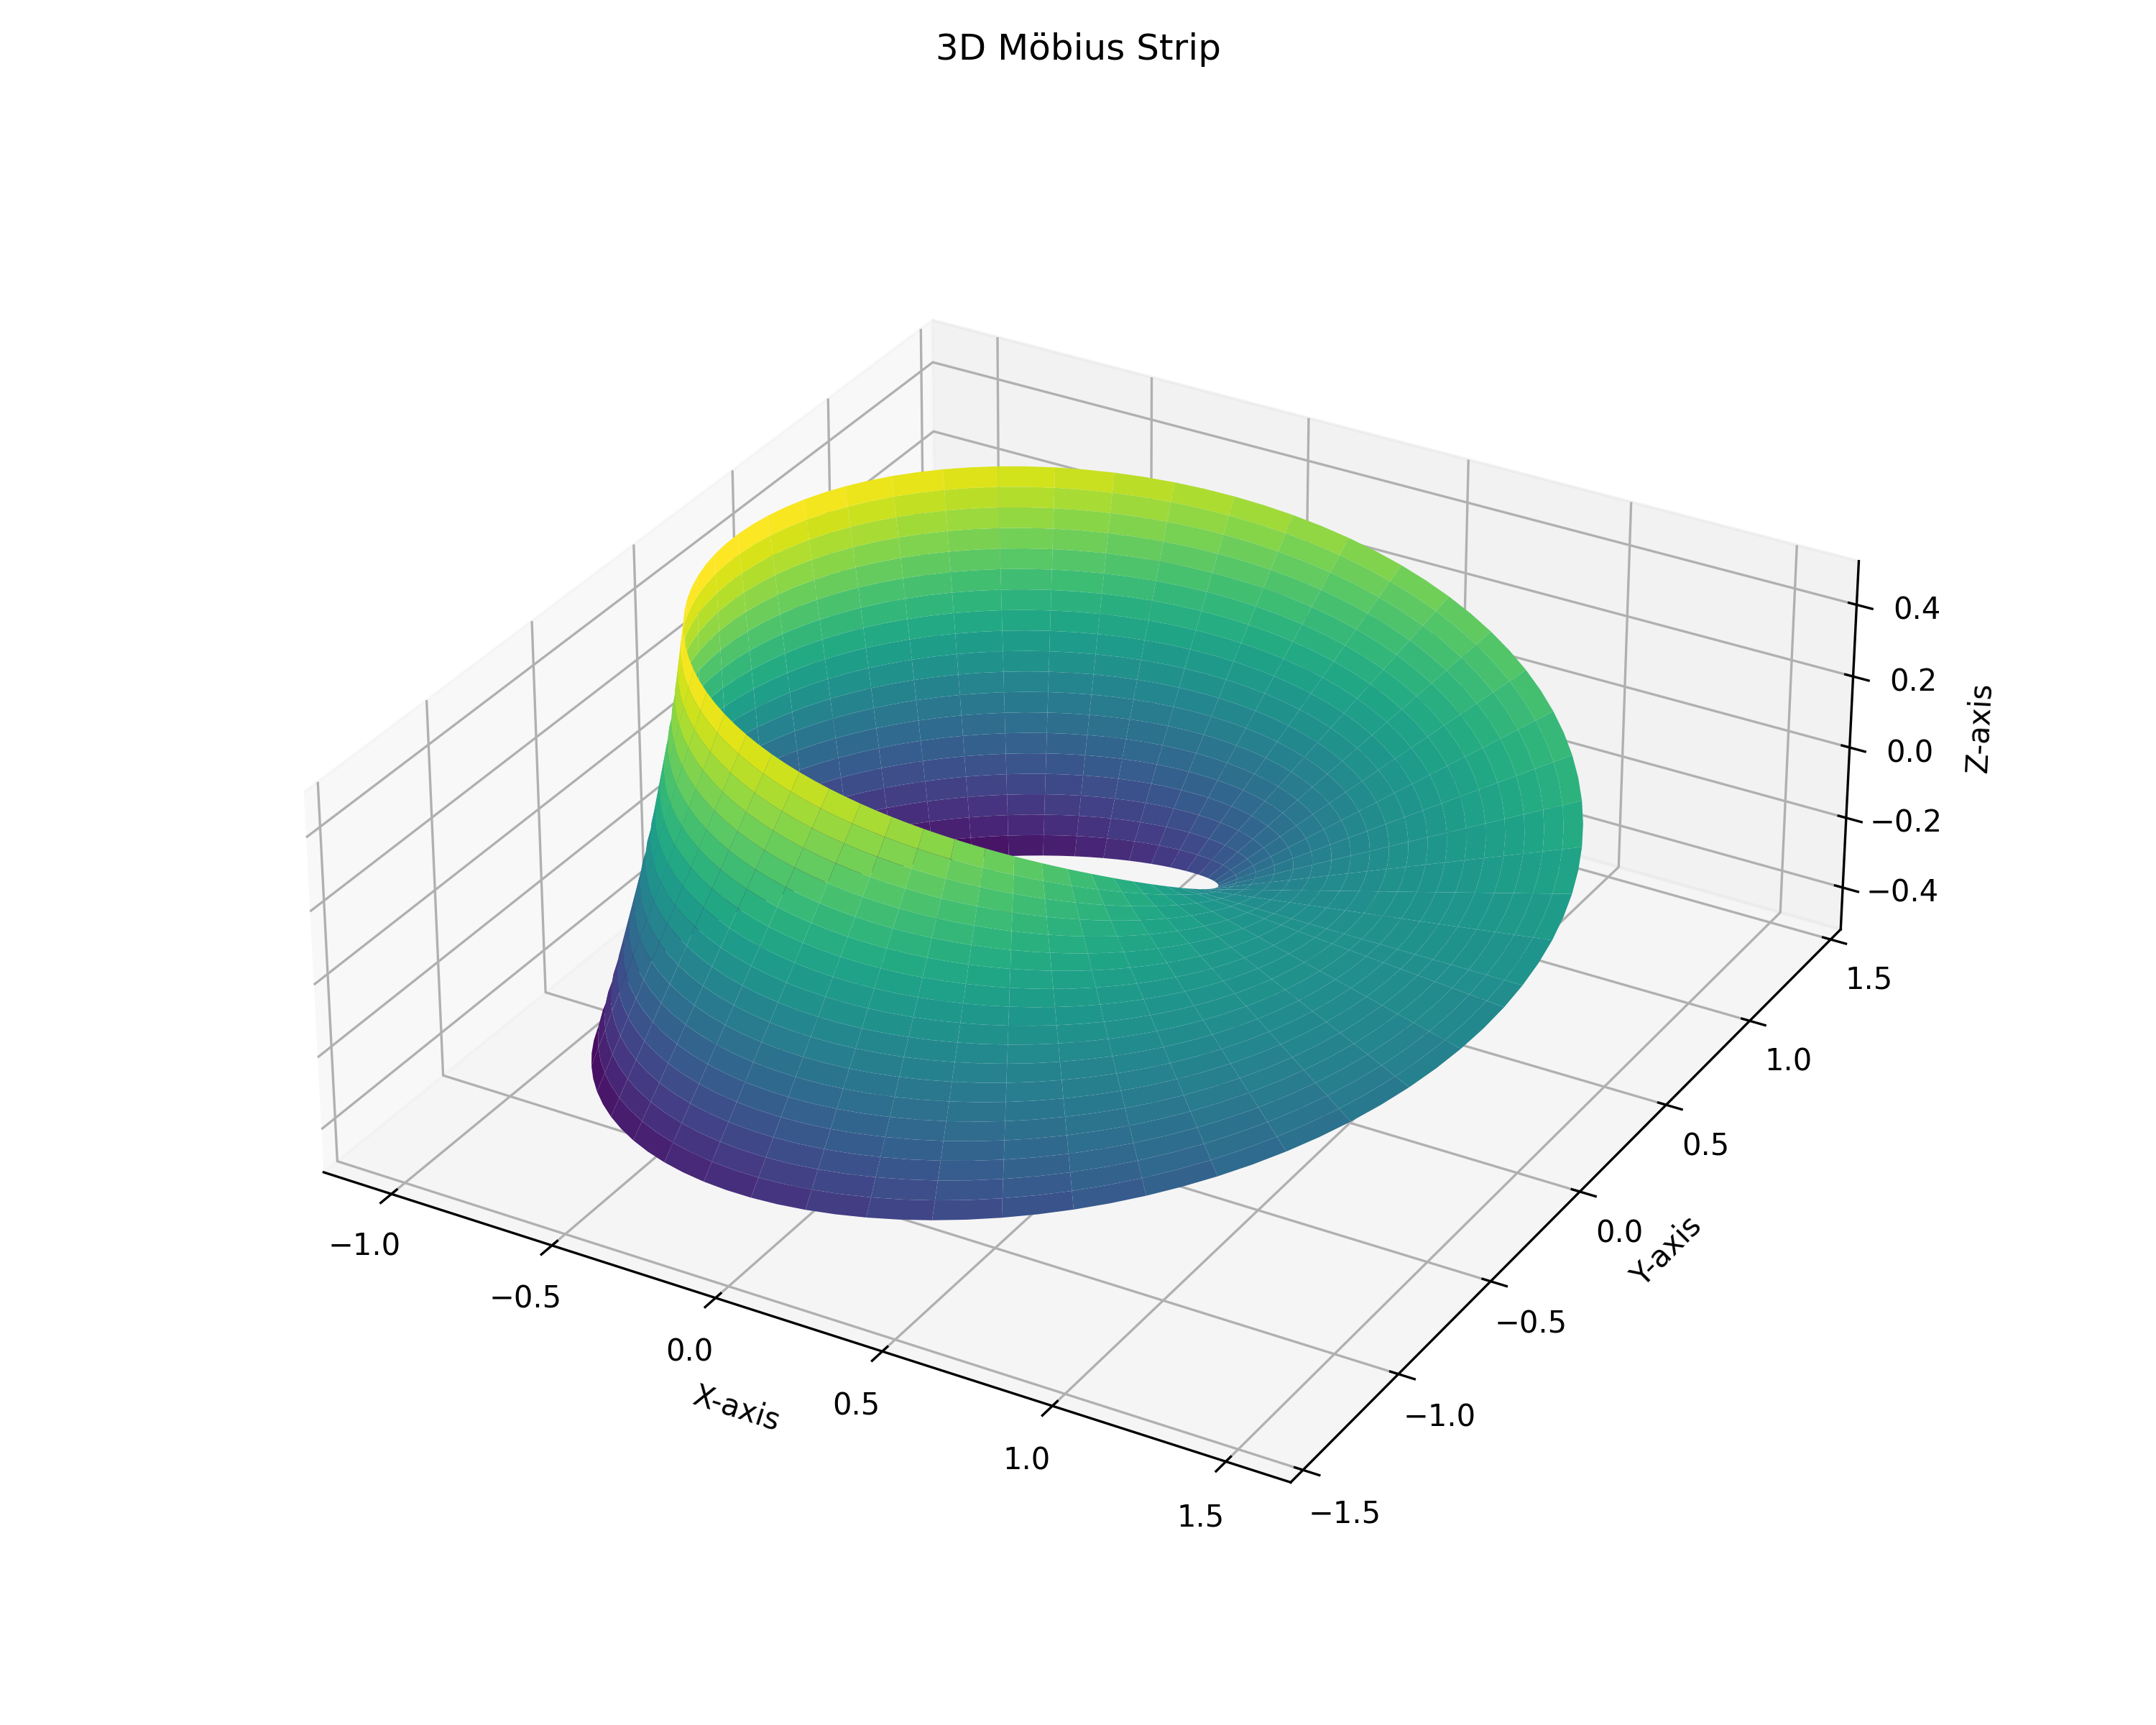


**Step number:** 2 out of 2.
 
**Sub-task:** Plot the 3D Möbius strip using matplotlib.
 
**Agent in charge of sub-task:** `engineer`
 
**Instructions:**
 
- Use matplotlib's plot_surface() function to render the Möbius strip.
- Apply a colormap (e.g., based on the z coordinate) to visualize the surface's topology and twist.
- Set the aspect ratio to 'equal' for all axes to ensure geometric accuracy.
- Add appropriate labels, titles, and set a suitable viewing angle.
- Display the plot.
 
**Status:** completed ✅
        

--------------------------------------------------------------------------------
Terminating...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,terminator,0.00503,2512,1,2513



--------------------------------------------------------------------------------
Session terminated.

--------------------------------------------------------------------------------

Timing report data saved to: /Users/boris/Desktop/cmbagent_dir/control/time/timing_report_step_2_20250804_180424.json


Displaying cost…

| Agent                       | Cost ($)    | Prompt Tokens | Completion Tokens | Total Tokens | Model              |
|:----------------------------|------------:|--------------:|------------------:|-------------:|-------------------:|
| executor response formatter | $0.00169290 |          1391 |                37 |         1428 | o3-mini-2025-01-31 |
| engineer response formatter | $0.00773850 |          1771 |              1316 |         3087 | o3-mini-2025-01-31 |
| terminator                  | $0.00503200 |          2512 |                 1 |         2513 | gpt-4.1-2025-04-14 |
| control starter             | $0.00135000 |           671 |                 1 |      

In [5]:
results = cmbagent.planning_and_control_context_carryover(task,
                              max_rounds_control = 30,
                              n_plan_reviews = 1,
                              max_n_attempts = 2,
                              max_plan_steps=2,
                              engineer_model = "gemini-2.5-pro",
                              researcher_model = "gpt-4.1-2025-04-14",
                              plan_reviewer_model = "claude-sonnet-4-20250514", 
                              plan_instructions=r"""
Use engineer for whole analysis. Plan must have 2 steps.
""",
                            work_dir=work_dir,
                            clear_work_dir = True,
                            # restart_at_step = 2, ## restart option available 
                             );

#### Post-Processing Traces

In [8]:
import os
from IPython.display import display, Markdown

def list_dir_tree(startpath, max_depth=5):
    output = ""
    startpath = os.path.expanduser(startpath)
    for root, dirs, files in os.walk(startpath):
        # Limit depth
        depth = root[len(startpath):].count(os.sep)
        if depth > max_depth:
            continue
        indent = "    " * depth
        output += f"{indent}- `{os.path.basename(root)}/`\n"
        for f in files:
            output += f"{indent}    - {f}\n"
    return output

tree_md = list_dir_tree(work_dir)
display(Markdown(f"**Tree view of** `{work_dir}`\n\n{tree_md}"))

**Tree view of** `~/Desktop/cmbagent_dir`

- `cmbagent_dir/`
    - `context/`
        - context_step_1.pkl
        - context_step_0.pkl
        - context_step_2.pkl
    - `planning/`
        - final_plan.json
        - `cost/`
            - cost_report_20250804_174357.json
        - `time/`
            - timing_report_planning_20250804_174357.json
        - `chats/`
            - chat_output_planning.json
    - `control/`
        - `cost/`
            - cost_report_step_1_20250804_174450.json
            - cost_report_step_2_20250804_174525.json
        - `time/`
            - timing_report_step_1_20250804_174450.json
            - timing_report_step_2_20250804_174525.json
        - `codebase/`
            - mobius_strip.py
            - plot_mobius_strip.py
        - `chats/`
            - chat_output_engineer_step_1.json
            - nested_chat_output_engineer_step_1_attempt_1.json
            - chat_history_step_1.json
            - nested_chat_output_engineer_step_2_attempt_1.json
            - chat_output_engineer_step_2.json
            - chat_history_step_2.json
        - `data/`
            - mobius_strip_plot_1_1754325918.png
            - mobius_strip_coordinates.npz
